# Gradient Descent

Gradient descent is an iterative optimization algorithm used to minimize the cost or error function of a machine learning model. It is commonly used in supervised learning problems, such as linear regression and logistic regression, to update the parameters of the model.

The basic idea behind gradient descent is to move in the direction of the negative gradient of the cost function with respect to the parameters. The gradient gives the direction of the steepest increase of the cost function, so moving in the opposite direction will result in the steepest decrease. The size of the step taken in this direction is controlled by a learning rate hyperparameter.

The algorithm starts with an initial set of parameters and then iteratively updates the parameters by computing the gradient of the cost function with respect to the parameters and adjusting the parameters in the opposite direction of the gradient. The process continues until the cost function is minimized or a stopping criterion is met.

There are different variants of gradient descent, are
- batch gradient descent
- stochastic gradient descent
- mini-batch gradient descent, 

that differ in the way the gradient is computed and the size of the data used to update the parameters.

### Learning rate

The learning rate is a hyperparameter in the gradient descent algorithm that controls the step size taken in the direction of the negative gradient during each update of the parameters. It is denoted by the Greek letter alpha (α) and is usually set to a small positive value.

The learning rate determines how fast or slow the algorithm converges to the minimum of the cost function. If the learning rate is too small, the algorithm will take many small steps to reach the minimum and may get stuck in a local minimum or saddle point. If the learning rate is too large, the algorithm may overshoot the minimum and oscillate around it, or even diverge and fail to converge.

The choice of the learning rate is crucial for the performance of the algorithm and can be challenging. A good starting point is to try different values of the learning rate and observe the behavior of the cost function during training. If the cost function decreases too slowly, the learning rate may be too small, and increasing it can help the algorithm converge faster. If the cost function oscillates or diverges, the learning rate may be too large, and decreasing it can make the algorithm more stable.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('GradientDescent.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [14]:
data.drop(["id","date","lat","long","zipcode","sqft_living15","sqft_lot15"], axis=1, inplace=True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 2.3 MB


<AxesSubplot: xlabel='grade', ylabel='count'>

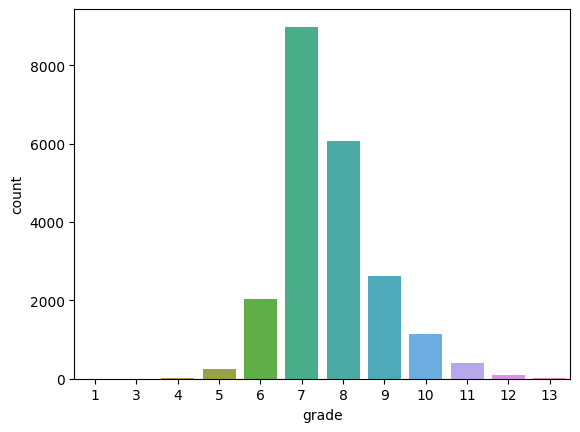

In [17]:
sns.countplot(x='grade',data=data)

<AxesSubplot: >

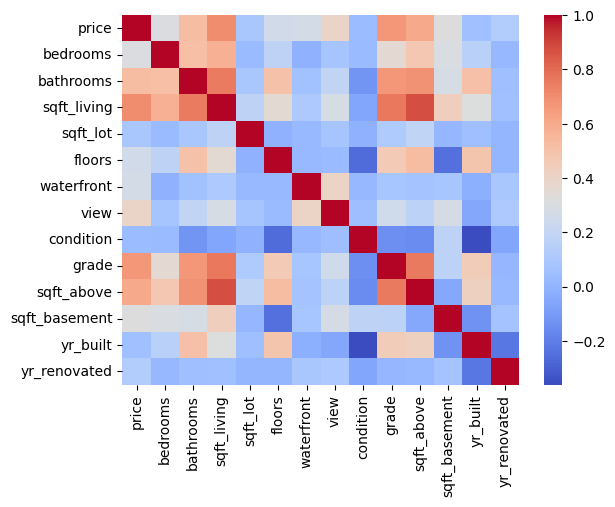

In [24]:
sns.heatmap(data.corr(), cmap='coolwarm') 

## Simple Linear Regression
+ Batch gradient descent

In [25]:
X = data["sqft_living"]
Y = data["price"]

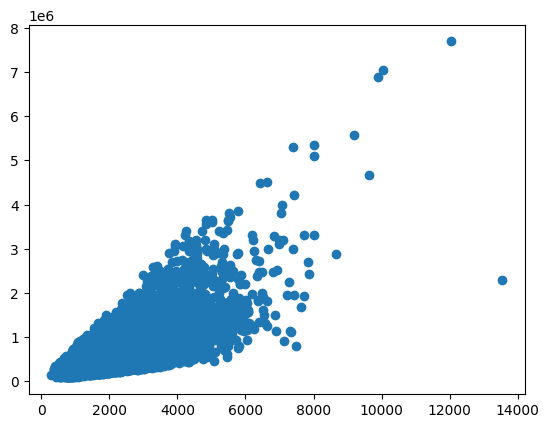

In [26]:
plt.scatter(X,Y)
plt.show()

In [49]:
def loss_function(m , b, points):
    totalError = 0
    for i in range(len(points)):
        x = points.iloc[i].sqft_living
        y = points.iloc[i].price
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [57]:
# differentiating the loss function with respect to m and b
# we get the following equations for the gradient of m and b
# m_gradient = -(2/N) * x * (y - ((m * x) + b))
# b_gradient = -(2/N) * (y - ((m * x) + b))

# by differentiating the loss function we maximize the loss function
# and by subtracting it from m and b we get lowest loss func tion
# hence the most optimal line


# this code has poor performance
# def gradient_descent(X,Y,points, m_current = 0,b_current = 0, L = 0.0001, iterations = 1000):
#     N = float(len(points))
#     gd_df = pd.DataFrame(columns=['m','b','loss'])
#     for i in range(iterations): 
#         y_current = (m_current * X) + b_current
#         cost = np.sum((Y - y_current) ** 2) /  N
#         m_gradient = -(2/N) * np.sum(X * (Y - y_current))
#         b_gradient = -(2/N) * np.sum(Y - y_current)
#         m_current = m_current - (L * m_gradient)
#         b_current = b_current - (L * b_gradient)
#         gd_df[i] = [m_current,b_current,cost]
#     return (gd_df)

# gradient = gradient_descent(X,Y,data)

gd_df = pd.DataFrame(columns=['m','b','loss'])
def gradient_descent(m_now,b_now,points,L):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points.iloc[i].sqft_living
        y = points.iloc[i].price
        m_gradient += -(2/N) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/N) * (y - ((m_now * x) + b_now))
    new_m = m_now - (L * m_gradient)
    new_b = b_now - (L * b_gradient)
    return [new_m, new_b]

In [ ]:
m_grad = 1
b_grad = 0
# learning rate
L = 0.001
epochs = 50

In [60]:
for i in range(epochs):
    m_grad, b_grad = gradient_descent(m_grad, b_grad, data, L)
    gd_df[i] = [m_grad,b_grad,loss_function(m_grad,b_grad,data)]
    print("i: {}".format(i))

i: 0
i: 1
i: 2
i: 3
i: 4
i: 5
i: 6


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 7
i: 8
i: 9
i: 10
i: 11
i: 12
i: 13
i: 14
i: 15
i: 16
i: 17
i: 18
i: 19
i: 20
i: 21
i: 22
i: 23
i: 24
i: 25
i: 26
i: 27
i: 28


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 29


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 30


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 31


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 32


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 33


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 34


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 35


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 36


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 37


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 38


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 39


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 40


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 41


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 42


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 43


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 44


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\1867303274.py:6: RuntimeWarning: overflow encountered in double_scalars
  totalError += (y - (m * x + b)) ** 2


i: 45


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\4123339247.py:35: RuntimeWarning: overflow encountered in double_scalars
  m_gradient += -(2/N) * x * (y - ((m_now * x) + b_now))


i: 46


C:\Users\pariv\AppData\Local\Temp\ipykernel_20524\4123339247.py:37: RuntimeWarning: invalid value encountered in double_scalars
  new_m = m_now - (L * m_gradient)


i: 47
i: 48
i: 49
i: 50
i: 51
i: 52


KeyboardInterrupt: 

In [62]:
print(pd.DataFrame(gd_df))

     m    b loss              0              1              2              3  \
0  NaN  NaN  NaN -7.103795e+122  7.343873e+126 -7.592064e+130  7.848643e+134   
1  NaN  NaN  NaN -2.858158e+119  2.954751e+123 -3.054609e+127  3.157842e+131   
2  NaN  NaN  NaN  2.608721e+252  2.788028e+260  2.979659e+268  3.184461e+276   

               4              5              6  ...             43  \
0 -8.113893e+138  8.388108e+142 -8.671590e+146  ...  2.966082e+295   
1 -3.264563e+135  3.374891e+139 -3.488948e+143  ...  1.193380e+292   
2  3.403340e+284  3.637264e+292  3.887266e+300  ...            inf   

              44             45             46   47  48  49  50  51  52  
0 -3.066322e+299  3.169951e+303           -inf  NaN NaN NaN NaN NaN NaN  
1 -1.233711e+296  1.275405e+300 -1.318509e+304  inf NaN NaN NaN NaN NaN  
2            inf            inf            inf  NaN NaN NaN NaN NaN NaN  

[3 rows x 56 columns]


In [ ]:
# code not completed will complete later
# https://www.youtube.com/watch?v=YrEMPoWQRoE